# Predicting Airlines Customer Service Satisfaction

# Introduction and Overview



https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In this Project, We have taken the dataset that contains information about the airline experience of the people. This dataset contains 24 coloumns that contains information about the customer's id, gender, age, Type of Travel, class etc.

Here the Target Column is the satisfaction column which tells whether the person is satisfid or not. We conclude with the target coloumn by checking the rating of the service offered by the airlines. These all can be compared over coloumns such as Inflight Entertainment, Onboard Service, Legroom Service etc. By checking the mentioned entities, we can depict whether a person is satisfied or not.

we will utilize both a k-NN model and a Decision Tree model to conduct our analysis and determine the best model.

# Importing all Required Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as pltB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score ,f1_score,classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

## Reading DATA from .csv file

In [5]:
df = pd.read_csv('Airlines.csv') #Reading CSV file and Storing as Data Frame.
df['satisfaction']=df['satisfaction'].replace({'satisfied':'Satisfied',
    'neutral or dissatisfied':'Dissatisfied'}) #replacing target name long string to short string.
df.shape

(103904, 25)

In [6]:
df.head() #checking first 5 rows.

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,Dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,Dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,Dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied


In [7]:
df.columns = [s.strip().replace(' ', '_') for s in df.columns] #Replacing spaces in column names with" _" .
df.head()

,Unnamed:_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,Dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,Dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,Dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied


#### We have changed the coloumn names here in a more readable and reliable way by adding an underscore in between the spaces. This will be more lookable and ideal.

In [8]:
n = 5000
df = df.iloc[:n]
df.shape

(5000, 25)

#### We have filtered the dataset to 5000 observations here. The original dataset contains 103904 observations, which is actually difficult to compute and our machine did not supported much well with this huge chunks of data. This is the reason we have taken a sample of 5000 observations from the parent dataset to perform ideal analysis.

In [9]:
df.drop(['Unnamed:_0','id'],axis=1,inplace=True) #Droping unwanted column's.

#### We have dropped the unwanted coloumns i.e. Unnamed:_0 and id here which were not actually useful for the computation and the analysis.

# Checking missing values

In [10]:
df.isna().sum() #Checking for null values.

Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             13
satisfaction                          0
dtype: int64

#### We have checked for the missing values in all the coloumns that were present in the dataset and found that only Arrival_Delay_in_Minutes coloumn have 19 NA values. We have dropped these Values in that particular coloumn because it can reduce the representativeness of the samples Which will create a discrepancy to proceed further.

In [11]:
df = df.dropna() # This will drop NA values in all the coloumns of the dataframe and produce an NA free dataset for the analysis.

In [12]:
df.dtypes #Checking all columns Data types.

Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_Delay_in_Minutes             float64
satisfacti

In [13]:
Category_Features = ['Gender','Customer_Type','Type_of_Travel','Class'] #Creating list of Categorical Features.

#### We are grouping all the object type variables into a list here to change their datatype to category which is feasible to find the relationship between the variables.

# Data visualization 

## What percentage of passengers are each of the following: different genders, customers, travel types, and flight cabin classes?

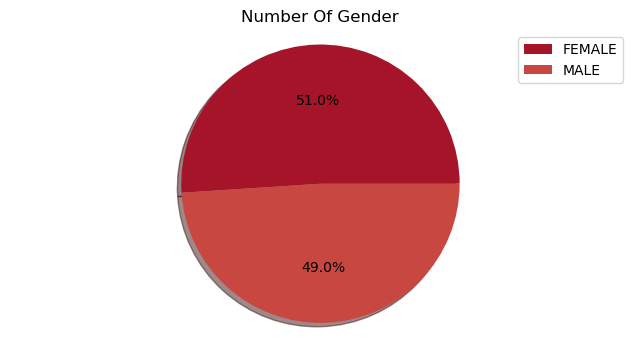

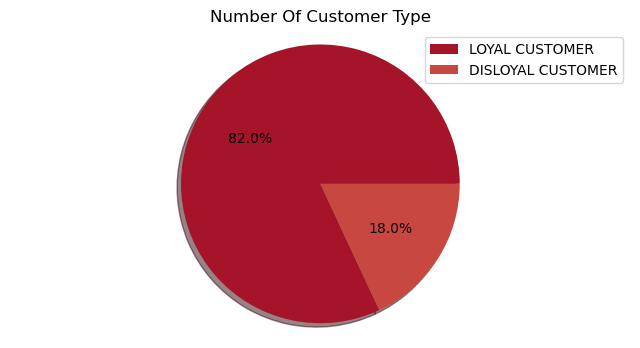

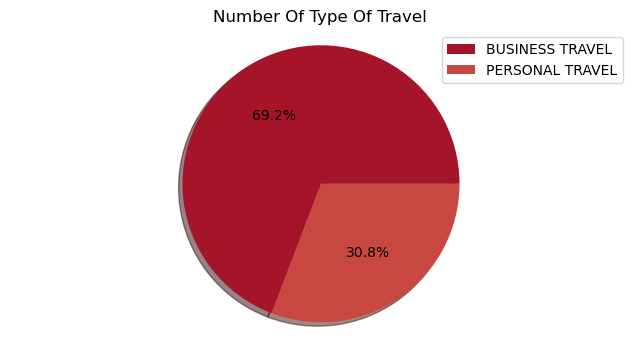

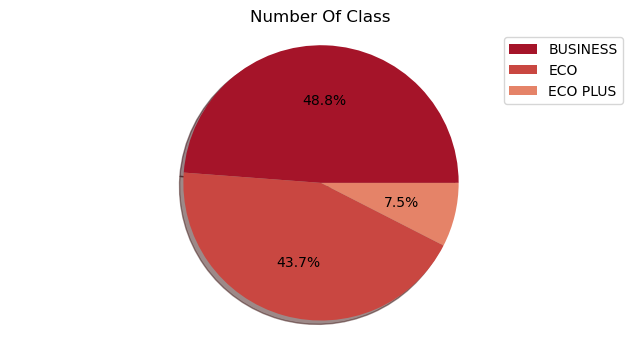

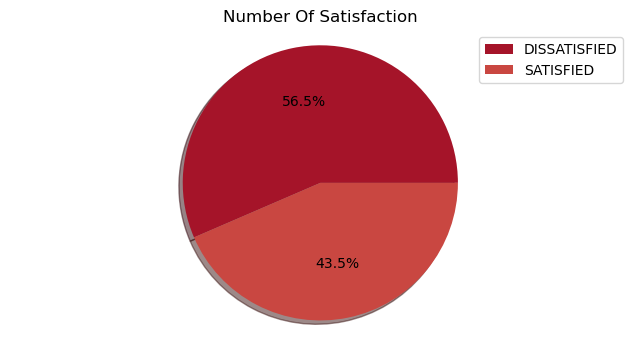

In [14]:
# Looping through all the category Features to know there ratio in given data.
for i in Category_Features+['satisfaction']:
    fig,ax =plt.subplots(figsize=(8,4)) #Creating subplot with width of 8 and height of 4.
    #Creating pie graph When Labeldistance is None Lables on pie chart wont dispaly.
    ax.pie(df[i].value_counts(),labels=[name.upper() for name in df[i].value_counts().keys()],
           colors=sns.color_palette("RdBu",11), autopct='%1.1f%%', shadow=True,
           labeldistance=None) 
    ax.axis('equal')  # For equal axis aspect ratio.
    # Removing _ From title and Replacing with space.
    ax.set_title("Number Of "+i.strip().replace('_', ' ').title()) #Adding title for each plot.
    ax.legend(loc="upper right") #adding legend to upper right.
    plt.show() # To Show plot.

- In Given Data there are 51% Female and 49% Male.
- In Given Data there are 82% Loyal Customers and 18 are DisLoyal.
- In Given Data there are two travelers types Business perpouse are 69.2% reaming 30.8% are personal.
- In Given Data There are  travlers from Three class cabins in flight 48.8% are Business 43.7% Eco and 7.5% Eco Plus.
- In Given Data 56.5% are Dissatised and 43.5% are Satisfied.

## Converting Class type to Category from object

In [15]:
#lopping through every categorya.
for i in Category_Features+['satisfaction']:
    df[i] = df[i].astype('category') #Casting from object class to category class.
df.dtypes #Cheching all columns Data types.

Gender                               category
Customer_Type                        category
Age                                     int64
Type_of_Travel                       category
Class                                category
Flight_Distance                         int64
Inflight_wifi_service                   int64
Departure/Arrival_time_convenient       int64
Ease_of_Online_booking                  int64
Gate_location                           int64
Food_and_drink                          int64
Online_boarding                         int64
Seat_comfort                            int64
Inflight_entertainment                  int64
On-board_service                        int64
Leg_room_service                        int64
Baggage_handling                        int64
Checkin_service                         int64
Inflight_service                        int64
Cleanliness                             int64
Departure_Delay_in_Minutes              int64
Arrival_Delay_in_Minutes          

Here, we have changed the object type into a category type including with the target variable.

In [16]:
df['satisfaction'].value_counts() #Checking Count of Target Variable.

Dissatisfied    2817
Satisfied       2170
Name: satisfaction, dtype: int64

## What is the ratio of Men and Women who are Satisfied and Dissatisfied?

In [17]:
# Filtering data frame where Gender equal male.
Men=df[df["Gender"]=="Male"]
# Filtering data frame where Gender equal Female.
Women=df[df["Gender"]=="Female"] 

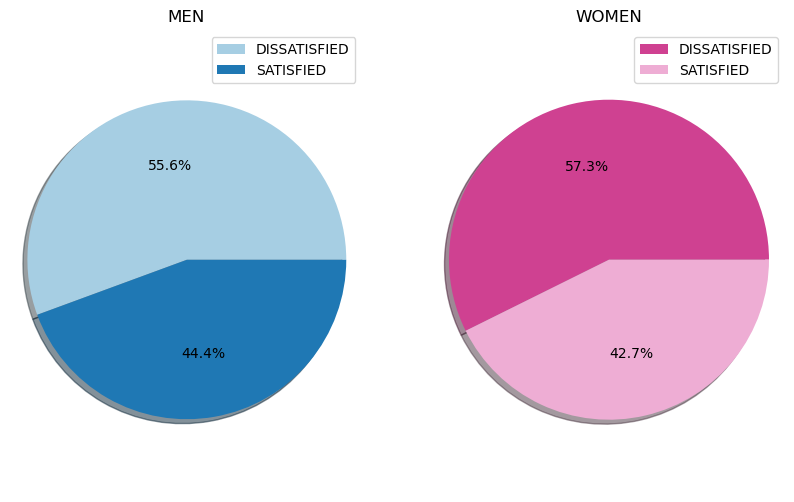

In [18]:

fig,ax =plt.subplots(1,2,figsize=(10,6)) #Creating subplot with width of 10 and height of 6.

#Creating pie graph When Labeldistance is None Lables on pie chart wont dispaly.
ax[0].pie(Men.groupby(["satisfaction"])["satisfaction"].count(),
          labels=["DISSATISFIED","SATISFIED"],colors=sns.color_palette("Paired"),
          autopct='%1.1f%%', shadow=True,labeldistance=None)
ax[0].axis('equal')  # For equal axis aspect ratio.
ax[0].set_title("MEN")# Adding SubTitle for pie graph.
ax[0].legend(loc="upper right") #Adding legend to upper right.

#Creating pie graph When Labeldistance is None Lables on pie chart wont dispaly.
ax[1].pie(Women.groupby(["satisfaction"])["satisfaction"].count(),
          labels=["DISSATISFIED","SATISFIED"],colors=sns.color_palette("PiYG",6),
          autopct='%1.1f%%', shadow=True,labeldistance=None)
ax[1].axis('equal') # For equal axis aspect ratio.
ax[1].set_title("WOMEN") # Adding SubTitle for pie graph.
ax[1].legend(loc="upper right")#Adding legend to upper right.
plt.show() #Show plot.


- Out of all the men, 44.4% are satisfied, while 55.6% are dissatisfied.
- Out of all the women, 57.3% are dissatisfied, while 42.7% are satified.

**From the observations above, we can conclude that male travelers are more satisfied than the female travelers.**

## What is the ratio of Loyal Customers and Disloyal Customers who are Satisfied and Dissatisfied?

In [19]:
# Filtering data frame where Customer_Type equal Loyal Customer.
Loyal_Customer=df[df["Customer_Type"]=="Loyal Customer"] 
# Filtering data frame where Customer_Type equal Disloyal Customer.
Disloyal_Customer=df[df["Customer_Type"]=="disloyal Customer"]

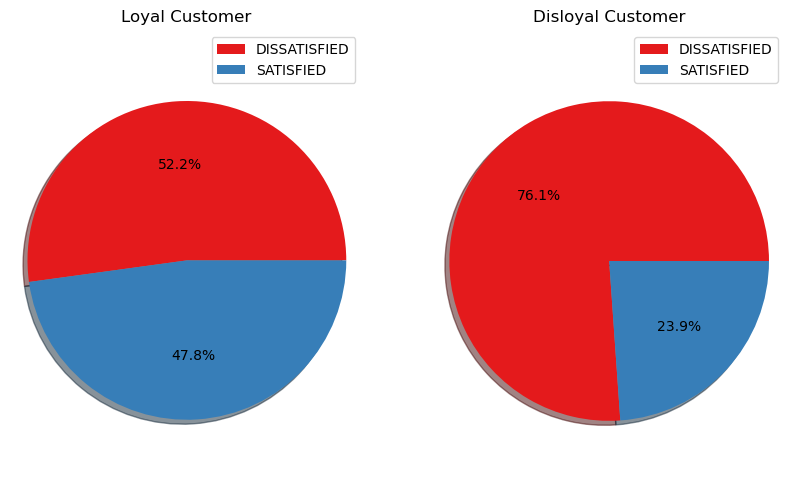

In [20]:
fig,ax =plt.subplots(1,2,figsize=(10,6)) #Creating subplot with width of 10 and height of 6.

#Creating pie graph When Labeldistance is None Lables on pie chart wont dispaly.
ax[0].pie(Loyal_Customer.groupby(["satisfaction"])["satisfaction"].count(),
          labels=["DISSATISFIED","SATISFIED"],colors=sns.color_palette("Set1"),
          autopct='%1.1f%%', shadow=True,labeldistance=None)
ax[0].axis('equal') # For equal axis aspect ratio.
ax[0].set_title("Loyal Customer") # Adding SubTitle for pie graph.
ax[0].legend(loc="upper right")#Adding legend to upper right.

#Creating pie graph When Labeldistance is None Lables on pie chart wont dispaly.
ax[1].pie(Disloyal_Customer.groupby(["satisfaction"])["satisfaction"].count(),
          labels=["DISSATISFIED","SATISFIED"],colors=sns.color_palette("Set1"),
          autopct='%1.1f%%', shadow=True,labeldistance=None)
ax[1].axis('equal') # For equal axis aspect ratio.
ax[1].set_title("Disloyal Customer") # Adding SubTitle for pie graph.
ax[1].legend(loc="upper right")#Adding legend to upper right.
plt.show() #Show plot.

- 52.2% of all loyal customers are dissatisfied, compared to 47.8% who are satisfied.
- From All Disloyal customers 76.1% are unsatisfied, while only 23.9% are satisfied.

**We can infer from the observations made above that loyal customers are happier than disloyal ones. Customers who are disloyal are the ones who are most dissatisfied.**

## What is the ratio of Type of Travel who are Satisfied and Dissatisfied?

In [21]:
# Filtering data frame where Type of Travel equal Business travel.
Business_travel=df[df["Type_of_Travel"]=="Business travel"]
# Filtering data frame where Type of Travel equal Personal Travel.
Personal_travel=df[df["Type_of_Travel"]=="Personal Travel"]

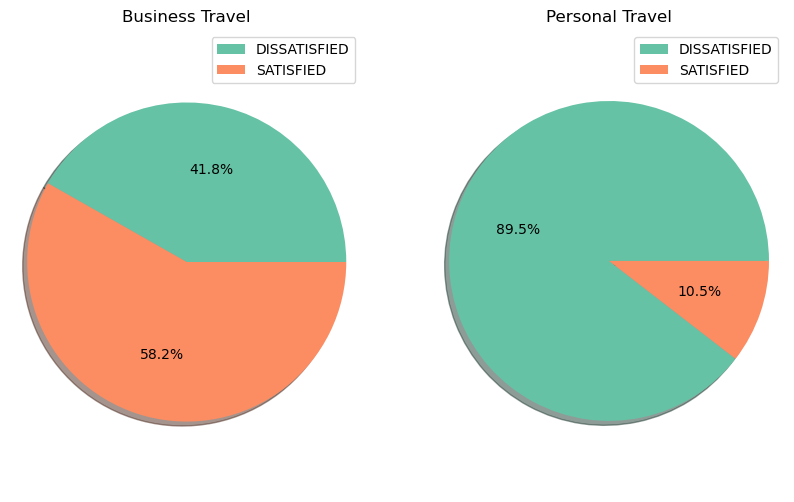

In [22]:
fig,ax =plt.subplots(1,2,figsize=(10,6))#Creating subplot with width of 10 and height of 6.

ax[0].pie(Business_travel.groupby(["satisfaction"])["satisfaction"].count(),
          labels=["DISSATISFIED","SATISFIED"],colors=sns.color_palette("Set2"),
          autopct='%1.1f%%', shadow=True,labeldistance=None)
ax[0].axis('equal') # For equal axis aspect ratio.
ax[0].set_title("Business Travel") # Adding SubTitle for pie graph.
ax[0].legend(loc="upper right")#Adding legend to upper right.

#Creating pie graph When Labeldistance is None Lables on pie chart wont dispaly.
ax[1].pie(Personal_travel.groupby(["satisfaction"])["satisfaction"].count(),
          labels=["DISSATISFIED","SATISFIED"],colors=sns.color_palette("Set2"),
          autopct='%1.1f%%', shadow=True,labeldistance=None)
ax[1].axis('equal') # For equal axis aspect ratio.
ax[1].set_title("Personal Travel") # Adding SubTitle for pie graph.
ax[1].legend(loc="upper right")#Adding legend to upper right.

plt.show() #Show plot.

- 10.5 percentage of personal travelers and 58.2 business travelers out of all travelers are satisfied.
- Among all the travelers 41.8 business travelers and 89.5 personal travelers are dissatisfied, respectively.

**While business travelers are more satisfied , personal travelers are not at all satisfied.**

## What is the ratio of flight class who are Satisfied and Dissatisfied?

In [23]:
# Filtering data frame where Class equal Business.
Business=df[df["Class"]=="Business"]
# Filtering data frame where Class equal Eco.
Eco=df[df["Class"]=="Eco"]
# Filtering data frame where Class equal Eco Plus.
Eco_Plus=df[df["Class"]=="Eco Plus"]

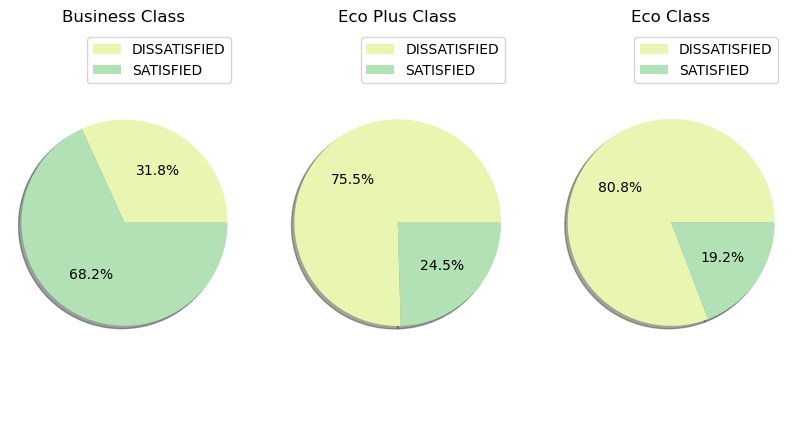

In [24]:
fig,ax =plt.subplots(1,3,figsize=(10,5))#Creating subplot with width of 10 and height of 6.
#Creating pie graph When Labeldistance is None Lables on pie chart wont dispaly.
ax[0].pie(Business.groupby(["satisfaction"])["satisfaction"].count(),
          labels=["DISSATISFIED","SATISFIED"],colors=sns.color_palette("YlGnBu"),
          autopct='%1.1f%%', shadow=True,labeldistance=None)
ax[0].axis('equal') # For equal axis aspect ratio.
ax[0].set_title("Business Class") # Adding SubTitle for pie graph.
ax[0].legend(loc="upper right") #Adding legend to upper right.
#Creating pie graph When Labeldistance is None Lables on pie chart wont dispaly.
ax[2].pie(Eco.groupby(["satisfaction"])["satisfaction"].count(),
          labels=["DISSATISFIED","SATISFIED"],colors=sns.color_palette("YlGnBu"),
          autopct='%1.1f%%', shadow=True,labeldistance=None)
ax[2].axis('equal') # For equal axis aspect ratio.
ax[2].set_title("Eco Class") # Adding SubTitle for pie graph.
ax[2].legend(loc="upper right") #Adding legend to upper right.
#Creating pie graph When Labeldistance is None Lables on pie chart wont dispaly.
ax[1].pie(Eco_Plus.groupby(["satisfaction"])["satisfaction"].count(),
          labels=["DISSATISFIED","SATISFIED"],colors=sns.color_palette("YlGnBu"),
          autopct='%1.1f%%', shadow=True,labeldistance=None)
ax[1].axis('equal') # For equal axis aspect ratio.
ax[1].set_title("Eco Plus Class") # Adding SubTitle for pie graph.
ax[1].legend(loc="upper right")#Adding legend to upper right.
plt.show() #Show plot.

- In the business class, 31.8% of participants are dissatisfied, while 68.2% are satisfied.
- In the ECo plus Class, 75.5% of participants are dissatisfied, while 24.5% are satisfied.
- Only 19.2% of passengers in the Eco class are happy, while 80.8% are not happy with the service.

**The most satisfied passengers are those traveling in business class, followed by eco plus and eco, respectively.**

# Encoding categorical features

## Encoding predictor categorical variables to numerical 

In [25]:
enc = OrdinalEncoder() #Creating instace of OrdinalEncoder.
for i in Category_Features:
    df[i]=enc.fit_transform(df[[i]]) #Coverting to numerical.
df.dtypes #Cheching all columns Data types.
df

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1.0,0.0,13,1.0,2.0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,Dissatisfied
1,1.0,1.0,25,0.0,0.0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,Dissatisfied
2,0.0,0.0,26,0.0,0.0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,0.0,0.0,25,0.0,0.0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,Dissatisfied
4,1.0,0.0,61,0.0,0.0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,33,0.0,0.0,1340,2,2,2,2,...,4,4,4,4,5,4,3,0,0.0,Satisfied
4996,0.0,0.0,54,1.0,1.0,223,1,4,1,1,...,5,5,1,5,3,5,5,37,28.0,Dissatisfied
4997,0.0,1.0,23,0.0,1.0,602,2,5,2,3,...,2,2,5,4,5,3,2,0,0.0,Dissatisfied
4998,1.0,0.0,40,0.0,0.0,459,4,4,4,4,...,5,5,4,5,2,5,2,0,0.0,Satisfied


## Encoding Target categorical variables to numerical

In [26]:
enc = LabelEncoder() #Creating instace of LabelEncoder.
df['satisfaction']=enc.fit_transform(df['satisfaction']) #Encoding target categorical variables to numerical.
df.dtypes #Checking Data Types.
df

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1.0,0.0,13,1.0,2.0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1.0,1.0,25,0.0,0.0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0.0,0.0,26,0.0,0.0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0.0,0.0,25,0.0,0.0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1.0,0.0,61,0.0,0.0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,33,0.0,0.0,1340,2,2,2,2,...,4,4,4,4,5,4,3,0,0.0,1
4996,0.0,0.0,54,1.0,1.0,223,1,4,1,1,...,5,5,1,5,3,5,5,37,28.0,0
4997,0.0,1.0,23,0.0,1.0,602,2,5,2,3,...,2,2,5,4,5,3,2,0,0.0,0
4998,1.0,0.0,40,0.0,0.0,459,4,4,4,4,...,5,5,4,5,2,5,2,0,0.0,1


The same way as above, we have performed the label encoding for the target variable. This will encode the dissatisfied value to '0' and satisfied value to '1'.

In [27]:
DT_DF=df.copy()

We are copying the dataframe here to perform the kfold cross validation,decision tree and the hyperparemeter tuning.

# k-NN Model

## Splitting the data on training and test sets

In [28]:
train_df, validation_df = train_test_split(df, test_size=0.3, random_state=1) #Spliting data.
train_df['satisfaction'].value_counts() #Checking count of unique values in target.

0    1961
1    1529
Name: satisfaction, dtype: int64

#### We are splitting the data into tarining and test here. The training takes 70% of the population data, whereas test takes the remaining 30%. As the population dataset contains 5000 observations, and there is a very negligible difference of about 11% between both the satisfied and Dissatisfied observations. Hence, we did not perform the data imbalancing technique here.

## Standardization of quantitative features

In [29]:
target = 'satisfaction'
predictors = list(df.columns) #Assigning Predictors and coverting pandas series object to list.
predictors.remove(target) #removing Target from predictors.
predictors #Checking Predictors list.

['Gender',
 'Customer_Type',
 'Age',
 'Type_of_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes']

In [30]:
for i in Category_Features:
    predictors.remove(i) #removing the category featurs from the predictors to avoid scaling
predictors #Checking Predictors list.
train_df[predictors]

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
1965,26,934,3,3,3,3,1,3,1,1,1,4,2,3,3,1,0,0.0
665,16,1325,5,4,5,3,5,4,4,5,5,4,5,4,4,4,243,226.0
1884,21,689,3,3,3,3,5,3,5,5,3,1,3,4,4,5,0,0.0
4126,26,2409,3,4,3,1,5,3,5,5,1,5,4,1,5,5,0,0.0
4744,62,2251,3,5,2,5,4,2,2,3,3,3,3,3,3,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,28,1123,3,2,2,4,2,2,2,2,1,1,3,4,3,2,0,0.0
2770,50,2612,2,2,2,2,3,5,5,5,5,5,5,4,5,3,0,0.0
906,40,639,1,3,1,1,4,1,4,4,2,4,1,2,1,4,0,0.0
3988,19,1575,4,4,4,4,3,3,3,3,5,5,4,5,5,3,10,0.0


In [31]:
# create a standard scaler and fit it to the training set of predictors.
scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])

# Transform the predictors of training and validation sets.
train_predictors = scaler.transform(train_df[predictors]) # train_predictors is not a numpy array.
train_target =  train_df[target]# train_target is now a series object.

validation_predictors = scaler.transform(validation_df[predictors]) # validation_target is now a series object.
validation_target = validation_df[target] # validation_target is now a series object.

In [32]:
list(validation_df.columns)

['Gender',
 'Customer_Type',
 'Age',
 'Type_of_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'satisfaction']

#### Here we are adding back the Standardized values back to dataframe after scaling them.

In [33]:
s=0
for i in predictors:
    train_df[i]=train_predictors[:,s]
    validation_df[i]=validation_predictors[:,s]
    s=s+1
train_df.head()    
col=list(validation_df.columns)
col.remove(target)
validation_df=validation_df[col]
validation_df

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
2594,1.0,0.0,-0.005993,0.0,1.0,-0.198410,0.203997,-0.665998,-0.539284,-0.768082,...,-0.327092,-0.258652,0.494012,1.259624,-0.510837,0.541718,0.296975,-0.198748,0.438537,0.027152
4915,1.0,0.0,0.587819,0.0,0.0,0.844014,0.954209,0.637245,0.173903,0.814330,...,0.430910,0.491095,0.494012,0.501678,0.327743,0.541718,0.296975,-0.198748,-0.412727,-0.417362
2924,0.0,1.0,0.653798,0.0,0.0,-0.372640,0.203997,-0.014377,0.173903,-1.559288,...,-0.327092,-0.258652,-0.279475,1.259624,0.327743,1.332763,1.142361,-0.198748,-0.253115,-0.417362
4285,1.0,0.0,0.257923,1.0,1.0,-0.283064,-0.546214,0.637245,-0.539284,0.814330,...,-0.327092,-0.258652,0.494012,-1.014215,1.166323,0.541718,1.142361,-0.198748,-0.412727,-0.365067
4257,0.0,1.0,-0.137951,0.0,0.0,-0.893360,0.954209,0.637245,0.887090,1.605536,...,-1.085095,-1.008399,1.267498,-1.014215,0.327743,1.332763,1.142361,-0.956814,-0.412727,-0.417362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.0,0.0,1.775442,1.0,1.0,-0.861860,0.203997,1.288866,0.173903,-0.768082,...,1.188913,-1.758145,-1.826447,-0.256268,-2.187998,0.541718,-2.239183,1.317385,-0.386125,-0.417362
4784,1.0,0.0,-0.071972,0.0,0.0,-0.263377,1.704420,1.288866,1.600277,1.605536,...,1.188913,0.491095,0.494012,0.501678,0.327743,0.541718,0.296975,1.317385,-0.412727,-0.417362
1147,1.0,0.0,-0.797742,0.0,0.0,1.138334,0.203997,-0.014377,0.173903,0.023124,...,0.430910,0.491095,-1.826447,1.259624,1.166323,0.541718,-2.239183,0.559318,-0.412727,-0.417362
2021,0.0,0.0,-1.061658,0.0,0.0,1.278111,-1.296426,-1.317619,-1.252471,-1.559288,...,1.188913,1.240842,-1.052961,1.259624,0.327743,-1.831415,0.296975,1.317385,-0.412727,-0.417362


#### Since, continuous variables are measured in different scales we performed standardization to get them into the same scale. Here we have performed the same on train_predictors and validation_predictors. Firstly, we have removed our categorical variables and the target variable, since we should not perform standardizing on them. Later, we will append thoe category features list to the standardized dataframe. Finally, we get a standardized dataframe.

## Applying K-NN Classifer 

### From the previous assignment we got best value of k to be 15 for 5000 observations

In [34]:
knn = KNeighborsClassifier(n_neighbors=15,  metric='euclidean') # user euclidean distance where k is sqrt(observation).
knn.fit(train_predictors, train_target) #Fitiing data into knn model.
knn_prediction_output = knn.predict(validation_predictors) #Predicting Output using Validation data.
knn_prediction_output # Checking prediction array.

array([0, 1, 0, ..., 1, 1, 0])

In [35]:
unique, counts = np.unique(knn_prediction_output, return_counts=True) #Getting Unique values and count from prediction array.
dict(zip(unique, counts)) #creating dictionary with unique features list and count list using zip to key value pair.

{0: 906, 1: 591}

#### Here, we have performed the knn model at the value of k = 15 and find the predictions of the same.

## Checking performance of model

In [36]:
print(f"Confusion Matrix:\n {(confusion_matrix(validation_target, knn_prediction_output))}")#Checking model Confusion Matrix.
print(f"Accuracy score:\n{(accuracy_score(validation_target, knn_prediction_output)):.4f}")#Checking model Accuracy score.
print(f"Precision score:\n{precision_score(validation_target, knn_prediction_output):.4f}")#Checking model Precision score.
print(f"Recall score:\n{recall_score(validation_target, knn_prediction_output):.4f}")#Checking model Recall score.
print(f"f1_score:\n{f1_score(validation_target, knn_prediction_output):.4f}")#Checking model f1_score.

Confusion Matrix:
 [[789  67]
 [117 524]]
Accuracy score:
0.8771
Precision score:
0.8866
Recall score:
0.8175
f1_score:
0.8506


#### We have obtained the confusion matrix here and the performance metrics by evaluting the model using the knn output that we received above.

# K Fold Cross Validation for K NN

#### In this scenario, false positive means  customer is not satisfied but it is predicted as customer satisfied, so the customer does not prefer the airlines next time. Where as false negative here is for customer satisfaction is predicted as not satisfied, this leads to monetary loss. So, FP and FN leads to loss. Hence we are considering accuracy as our metric as our data is balanced.

In [37]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,round(np.sqrt(len(df))),2)),
    'metric': ['euclidean', 'cosine','manhattan','minkowski'],
    'weights':['uniform','distance']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_predictors, train_target)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyKnn = gridSearch.best_estimator_ 

accuracy score:  0.893409742120344
parameters:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


#### From the above observations we can depict that the best value of k is found to be at k=5 with the accuracy of 89% by using cosine metric. Where accuracy is improved from previous assignment after performing k fold that means it has improved model performance.

# Decision Tree

In [38]:
DT_DF.shape #checking shape of data.

(4987, 23)

In [39]:
DT_DF.head() #checking first head.

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1.0,0.0,13,1.0,2.0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1.0,1.0,25,0.0,0.0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0.0,0.0,26,0.0,0.0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0.0,0.0,25,0.0,0.0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1.0,0.0,61,0.0,0.0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [40]:
DT_DF.dtypes #Checking data types of columns.

Gender                               float64
Customer_Type                        float64
Age                                    int64
Type_of_Travel                       float64
Class                                float64
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online_booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_Delay_in_Minutes             float64
satisfacti

# Splitting the data on training and test sets

In [41]:
target = 'satisfaction'
predictors = list(df.columns) #Assigning Predictors and coverting pandas series object to list.
predictors.remove(target) #removing Target from predictors.
X = df[predictors] #Data Frame Of Predictiors.
y = df[target] #Data Frame Of Target.
y.value_counts() #checking Target features count.

0    2817
1    2170
Name: satisfaction, dtype: int64

#### We have split the data into training and test here to perform the analysis on our data using the Decision Tree model.

In [42]:
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.3, random_state=1) #Spliting data into 70:30.

In [43]:
dtree=DecisionTreeClassifier(random_state=1) #Applying to Decision Tree Model.

In [44]:
dtree.fit(train_X, train_y) #Fitting to Decision Tree Model.

DecisionTreeClassifier(random_state=1)

In [45]:
dtree.classes_ #checking classes

array([0, 1])

In [46]:
validation_predictions = dtree.predict(valid_X)

print('Confusion Matrix:\n ', confusion_matrix(valid_y, validation_predictions)) #Checking model Confusion Matrix.
print('Accuracy score:\n', accuracy_score(valid_y, validation_predictions)) #Checking model Accuracy score.
print('Precision score:\n', precision_score(valid_y, validation_predictions)) #Checking model Precision score.
print('Recall score:\n', recall_score(valid_y, validation_predictions)) #Checking model Recall score.
print('f1_score:\n',f1_score(valid_y, validation_predictions)) #Checking model f1_score.

Confusion Matrix:
  [[781  75]
 [ 76 565]]
Accuracy score:
 0.8991315965263861
Precision score:
 0.8828125
Recall score:
 0.8814352574102964
f1_score:
 0.8821233411397347


In [47]:
train_predictions = dtree.predict(train_X)


print('Confusion Matrix:\n', confusion_matrix(train_y, train_predictions)) #Checking model Confusion Matrix
print('Accuracy score:\n', accuracy_score(train_y, train_predictions)) #Checking model Accuracy score
print('Precision score:\n', precision_score(train_y, train_predictions)) #Checking model Precision score.
print('Recall score:\n', recall_score(train_y, train_predictions)) #Checking model Recall score.
print('f1_score:\n',f1_score(valid_y, validation_predictions)) #Checking model f1_score.


Confusion Matrix:
 [[1961    0]
 [   0 1529]]
Accuracy score:
 1.0
Precision score:
 1.0
Recall score:
 1.0
f1_score:
 0.8821233411397347


In [48]:
print(classification_report(valid_y, dtree.predict(valid_X), target_names=['Dissatisfied', 'Satisfied']))

              precision    recall  f1-score   support

Dissatisfied       0.91      0.91      0.91       856
   Satisfied       0.88      0.88      0.88       641

    accuracy                           0.90      1497
   macro avg       0.90      0.90      0.90      1497
weighted avg       0.90      0.90      0.90      1497



#### Here after performing the analysis on the splitted data, we were able to get the value of the performace metrics here and found that the accuracy is found to be 1. This is probably overfitting the data and not reliable to proceed.

## K Fold Cross Validation for Decision Tree

#### We are using the K Fold Cross Validation technique here to perform the analysis on our data. By using k-fold cross-validation, we are able to test the model on k different data sets, which helps to ensure that the model is generalizable and it will also help to reduce the overfitting of the data.

In [49]:
treeClassifier = DecisionTreeClassifier(random_state=1) #defining model
scores = cross_val_score(treeClassifier, train_X, train_y, cv=10)
scores.mean()

0.9160458452722064

In [50]:
precision = cross_val_score(treeClassifier, train_X, train_y, cv=10, scoring='precision')
precision.mean()

0.905991915380435

In [51]:
recall = cross_val_score(treeClassifier, train_X, train_y, cv=10, scoring='recall')
recall.mean()

0.9025670794633642

In [52]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyTree = gridSearch.best_estimator_

accuracy score:  0.9323782234957021
parameters:  {'max_depth': 20, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


In [53]:
score_measure = 'precision'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionTree = gridSearch.best_estimator_


precision score:  0.9243079618467285
parameters:  {'max_depth': 20, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


In [54]:
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestRecallTree = gridSearch.best_estimator_

recall score:  0.9234735122119023
parameters:  {'max_depth': 20, 'min_impurity_decrease': 0.001, 'min_samples_split': 2}


In [55]:
print("*****************")
print("Best Accuracy Tree")
print(classification_report(valid_y, bestAccuracyTree.predict(valid_X)))
print("*****************")
print("Best Precision Tree")
print(classification_report(valid_y, bestPrecisionTree.predict(valid_X)))
print("*****************")
print("Best Recall Tree")
print(classification_report(valid_y, bestRecallTree.predict(valid_X)))

*****************
Best Accuracy Tree
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       856
           1       0.90      0.88      0.89       641

    accuracy                           0.91      1497
   macro avg       0.91      0.91      0.91      1497
weighted avg       0.91      0.91      0.91      1497

*****************
Best Precision Tree
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       856
           1       0.90      0.88      0.89       641

    accuracy                           0.91      1497
   macro avg       0.91      0.91      0.91      1497
weighted avg       0.91      0.91      0.91      1497

*****************
Best Recall Tree
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       856
           1       0.91      0.88      0.89       641

    accuracy                           0.91      1497
   macro avg      

# Business Conclusion

- #### Since there is not much of difference between FN’s and FP’s, we are focusing on both accuracy here. The accuracy is found to be improving here when compared with the conventional decision tree model and also provides an optimal output here.
- #### We have noticed that after implementing K- Fold cross validation as well as Hyper parameter tuning, we have found that the accuracy of both models have been improved and we have overcome the overfitting of decision tree. 
- #### Overall, decision tree turned out to be better model in comparison. This is made even better as we have accounted for overfitting by pruning the model. In conclusion, methods like K- Fold cross validation as well hyper parameter tuning, are extremely useful in improving the quality of outputs for binary classification model generation.
- #### From the above metric after performing hyper parameter tunning, we got a good accuracy scorer for the decision tree of 0.9323782234957021, and for knn we got an accuracy scorer of 0.893409742120344.